# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


In [11]:
#Testing code on smaller amount of cities before running entire query
# cities=cities[:9]
# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"
api_format = "json"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | gibong
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | tazovsky
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | fale old settlement
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | itajuipe
Processing Record 21 of Set 1 | hermanus
Processing Record 2

Processing Record 41 of Set 4 | labytnangi
Processing Record 42 of Set 4 | las trojes
Processing Record 43 of Set 4 | tabuk
Processing Record 44 of Set 4 | cable beach
City not found. Skipping...
Processing Record 45 of Set 4 | ndola
Processing Record 46 of Set 4 | igrim
Processing Record 47 of Set 4 | raichur
Processing Record 48 of Set 4 | laufach
Processing Record 49 of Set 4 | monterrey
Processing Record 0 of Set 5 | kamaishi
Processing Record 1 of Set 5 | galion
Processing Record 2 of Set 5 | valparaiso
Processing Record 3 of Set 5 | uturoa
Processing Record 4 of Set 5 | dudinka
Processing Record 5 of Set 5 | tolanaro
Processing Record 6 of Set 5 | malango
Processing Record 7 of Set 5 | castillos
Processing Record 8 of Set 5 | mhasvad
Processing Record 9 of Set 5 | luganville
Processing Record 10 of Set 5 | ninghai
Processing Record 11 of Set 5 | isangel
Processing Record 12 of Set 5 | karak city
Processing Record 13 of Set 5 | great falls
Processing Record 14 of Set 5 | natal
Pro

City not found. Skipping...
Processing Record 35 of Set 8 | sola
Processing Record 36 of Set 8 | kenai
Processing Record 37 of Set 8 | kabinda
Processing Record 38 of Set 8 | aoulef
Processing Record 39 of Set 8 | bangassou
Processing Record 40 of Set 8 | behbahan
Processing Record 41 of Set 8 | myeik
Processing Record 42 of Set 8 | lao cai
Processing Record 43 of Set 8 | saint-pierre
Processing Record 44 of Set 8 | kavaratti
Processing Record 45 of Set 8 | salalah
Processing Record 46 of Set 8 | barcelos
Processing Record 47 of Set 8 | alotau
City not found. Skipping...
Processing Record 48 of Set 8 | touros
Processing Record 49 of Set 8 | huarmey
Processing Record 0 of Set 9 | makary
Processing Record 1 of Set 9 | yankton
Processing Record 2 of Set 9 | madison
Processing Record 3 of Set 9 | hwange
Processing Record 4 of Set 9 | rio grande
Processing Record 5 of Set 9 | anadyr
Processing Record 6 of Set 9 | cobram
Processing Record 7 of Set 9 | kasongo-lunda
Processing Record 8 of Set

Processing Record 23 of Set 12 | la'ie
Processing Record 24 of Set 12 | guerrero negro
Processing Record 25 of Set 12 | lynn haven
Processing Record 26 of Set 12 | valle vista
Processing Record 27 of Set 12 | mufumbwe
Processing Record 28 of Set 12 | vengerovo
Processing Record 29 of Set 12 | panama city beach
Processing Record 30 of Set 12 | diu
-----------------------------
Data Retrieval Complete      
-----------------------------


In [13]:
#city_weather

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,63.77,82,75,11.50,PT,1704055255
1,west island,-12.1568,96.8225,80.58,83,40,8.05,CC,1704055214
2,isafjordur,66.0755,-23.1240,23.74,89,94,6.29,IS,1704055256
3,gibong,11.8634,122.0394,78.76,88,64,9.35,PH,1704055256
4,hamilton,39.1834,-84.5333,42.24,86,100,23.02,US,1704055185


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,63.77,82,75,11.50,PT,1704055255
1,west island,-12.1568,96.8225,80.58,83,40,8.05,CC,1704055214
2,isafjordur,66.0755,-23.1240,23.74,89,94,6.29,IS,1704055256
3,gibong,11.8634,122.0394,78.76,88,64,9.35,PH,1704055256
4,hamilton,39.1834,-84.5333,42.24,86,100,23.02,US,1704055185


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

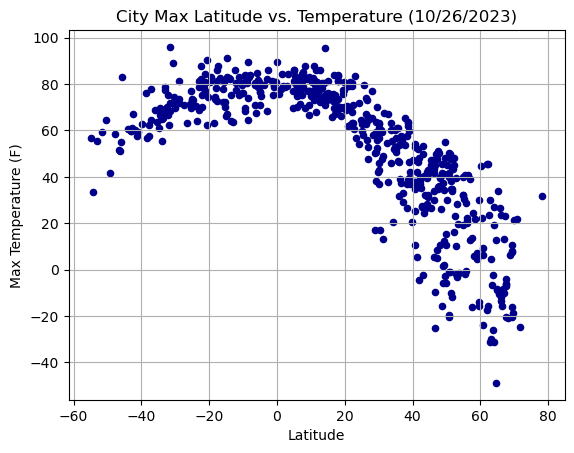

In [18]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp", c="DarkBlue", grid="axis grid lines")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (10/26/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

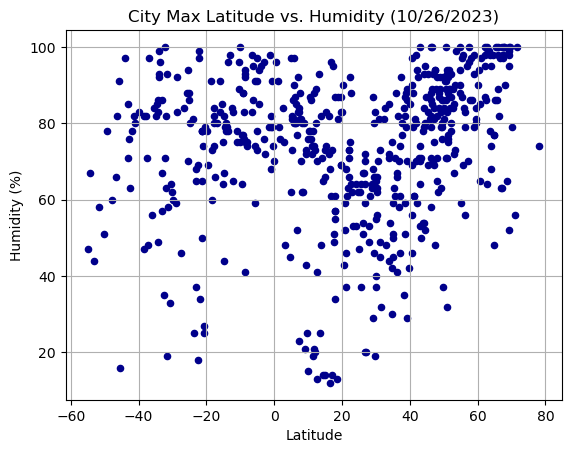

In [19]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat", "Humidity", c="DarkBlue", grid="axis grid lines")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (10/26/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

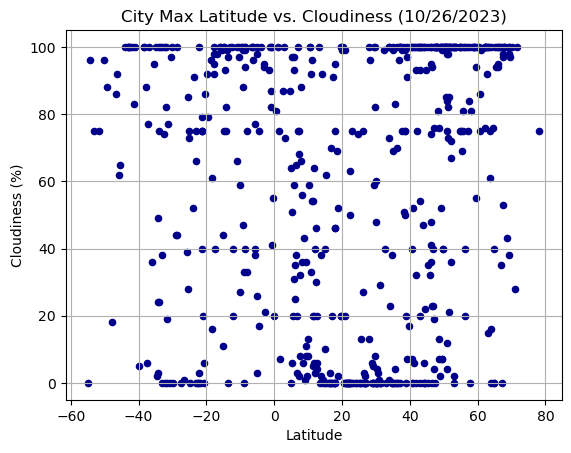

In [20]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat", "Cloudiness", c="DarkBlue", grid="axis grid lines")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (10/26/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

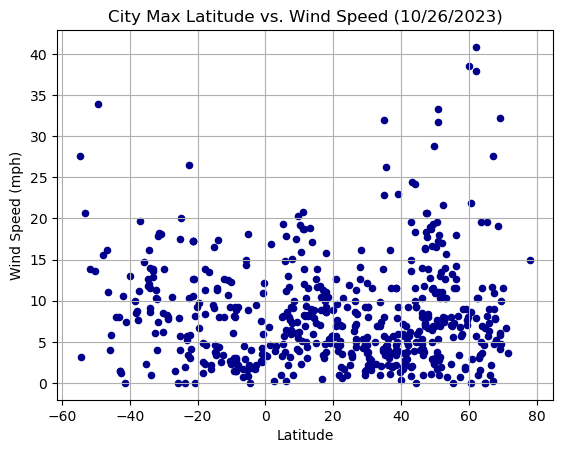

In [21]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat", "Wind Speed", c="DarkBlue", grid="axis grid lines")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (10/26/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


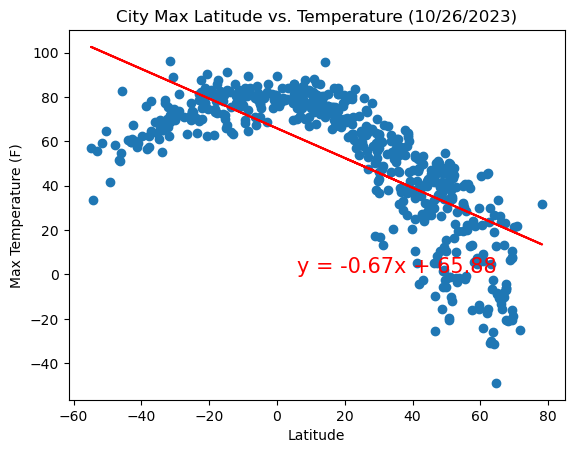

In [22]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Max Latitude vs. Temperature (10/26/2023)")
plt.show()

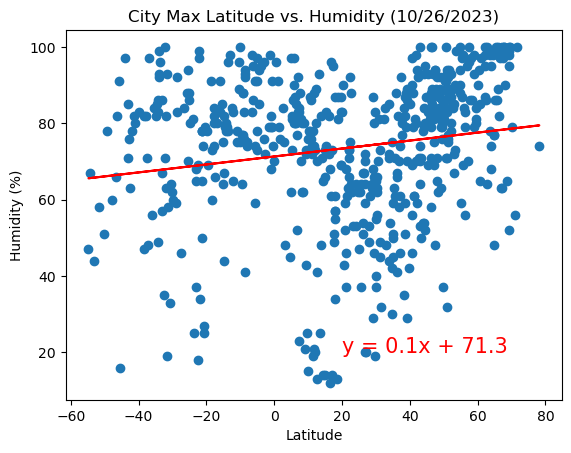

In [23]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (10/26/2023)")
plt.show()

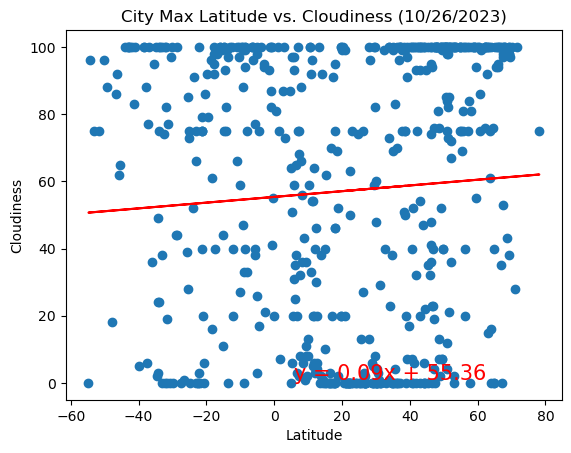

In [24]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs. Cloudiness (10/26/2023)")
plt.show()

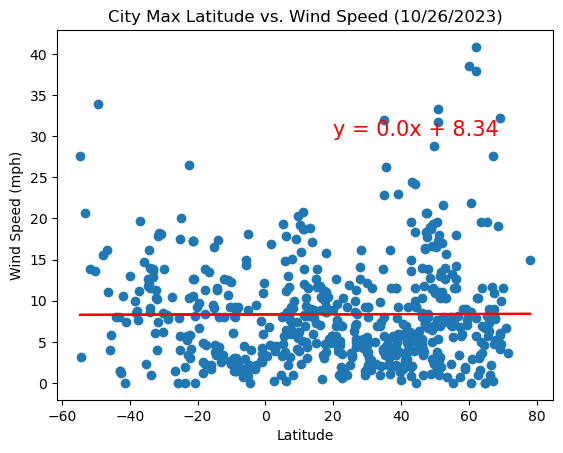

In [25]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Max Latitude vs. Wind Speed (10/26/2023)")
plt.show()

In [26]:
#Change Latitude datatype from string to integer
city_data_df["Lat"] = city_data_df["Lat"].astype(int)
print(city_data_df.dtypes)

City           object
Lat             int32
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38,-28.7000,63.77,82,75,11.50,PT,1704055255
2,isafjordur,66,-23.1240,23.74,89,94,6.29,IS,1704055256
3,gibong,11,122.0394,78.76,88,64,9.35,PH,1704055256
4,hamilton,39,-84.5333,42.24,86,100,23.02,US,1704055185
5,tazovsky,67,78.7000,-6.88,97,98,10.94,RU,1704055257


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12,96.8225,80.58,83,40,8.05,CC,1704055214
6,waitangi,-43,-176.5597,60.82,97,100,8.01,NZ,1704055258
7,grytviken,-54,-36.5092,33.62,67,96,3.20,GS,1704055258
10,ushuaia,-54,-68.3000,56.82,47,0,27.63,AR,1704055188
11,avarua,-21,-159.7750,84.25,65,40,12.66,CK,1704055259


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8566371937182076


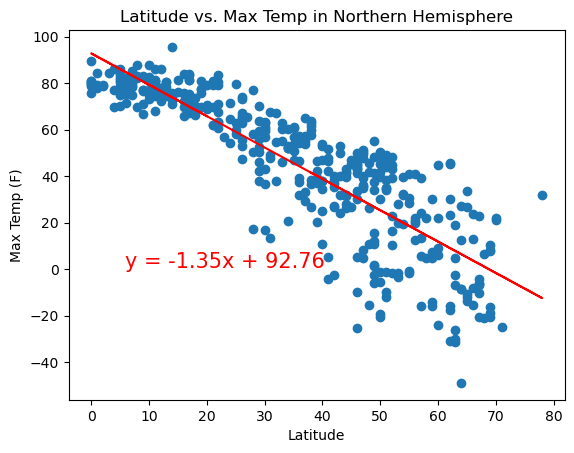

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = np.corrcoef(x_values, y_values)[1]
print("The r-value is:",r_value[0])

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Latitude vs. Max Temp in Northern Hemisphere")
plt.show()

The r-value is: 0.6524330861392192


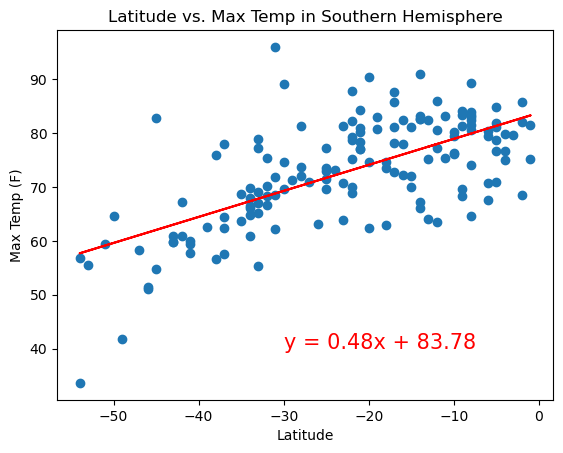

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = np.corrcoef(x_values, y_values)[1]
print("The r-value is:",r_value[0])

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Latitude vs. Max Temp in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere the temperature decreases as the latitude is increasing showing a negative linear relationship.
In the Southern Hemisphere the temperature and latitude increase together showing a positive linear relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.36037424341791435


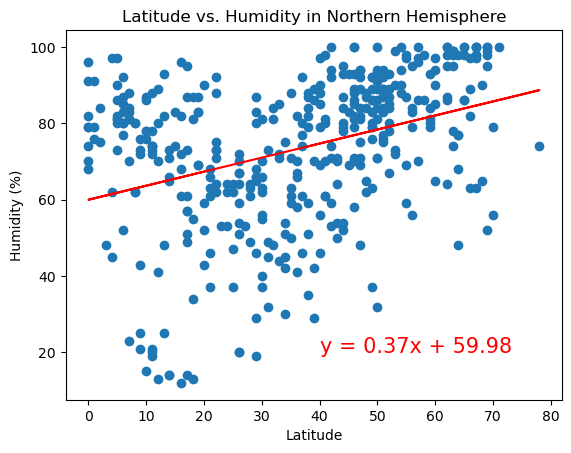

In [31]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value_northern = np.corrcoef(x_values_northern, y_values_northern)[1]
print("The r-value is:",r_value_northern[0])

plt.scatter(x_values_northern,y_values_northern)
plt.plot(x_values_northern,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity in Northern Hemisphere")
plt.show()

The r-value is: 0.26742996128510826


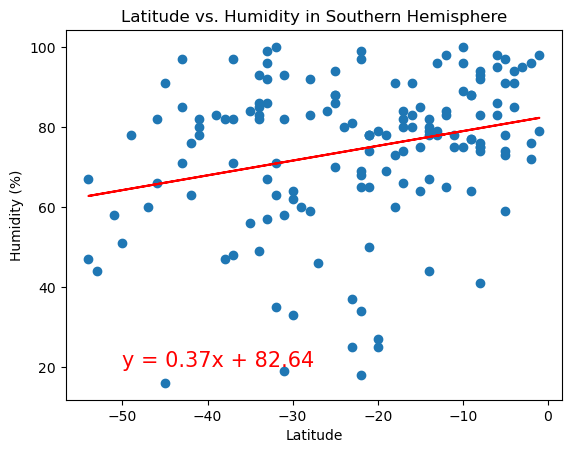

In [32]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = np.corrcoef(x_values_southern, y_values_southern)[1]
print("The r-value is:", r_value[0])

plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

In the plots above it shows as the humidity increases in percent the latitude increases for both the northern and southern hemispheres causing a positive linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3531388794118347


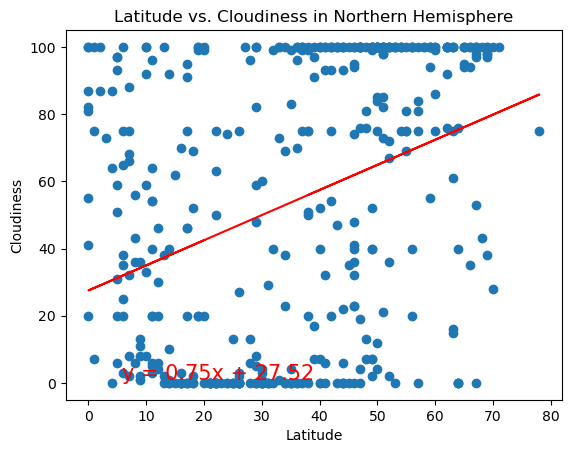

In [33]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value_northern = np.corrcoef(x_values_northern, y_values_northern)[1]
print("The r-value is:",r_value_northern[0])

plt.scatter(x_values_northern,y_values_northern)
plt.plot(x_values_northern,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in Northern Hemisphere")
plt.show()

The r-value is: 0.046526636751011874


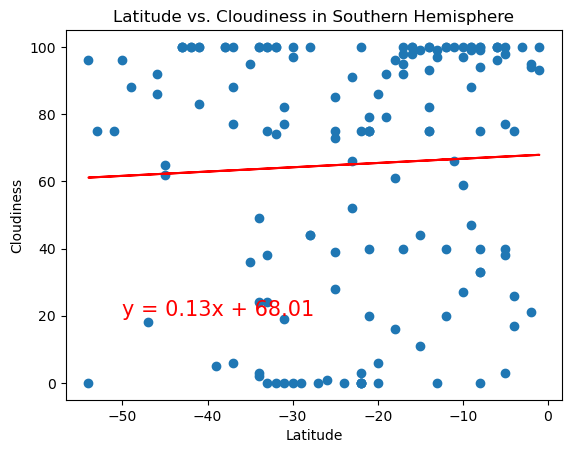

In [34]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = np.corrcoef(x_values_southern, y_values_southern)[1]
print("The r-value is:", r_value[0])

plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

In the plots above it shows as the cloudiness increases in percent the latitude increases for both the northern and southern hemispheres causing a positive linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10425867943193626


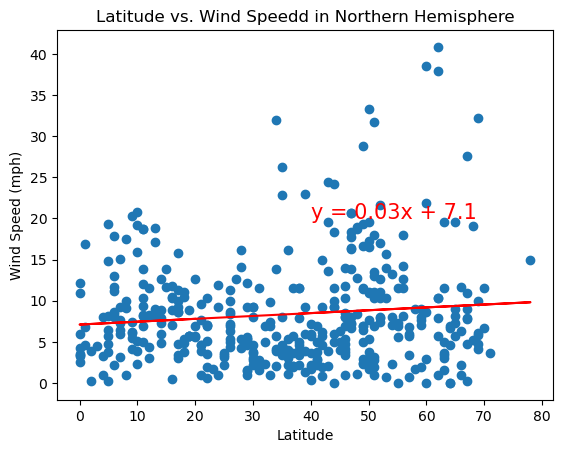

In [35]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value_northern = np.corrcoef(x_values_northern, y_values_northern)[1]
print("The r-value is:",r_value_northern[0])

plt.scatter(x_values_northern,y_values_northern)
plt.plot(x_values_northern,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speedd in Northern Hemisphere")
plt.show()

The r-value is: -0.35996808610139275


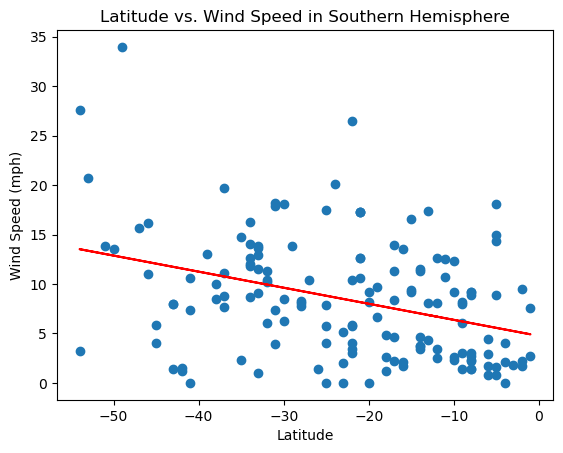

In [36]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = np.corrcoef(x_values_southern, y_values_southern)[1]
print("The r-value is:", r_value[0])

plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Wind Speed in the Northern Hemisphere show a very small positive linear relationship showing slight wind speed increase as latitude increases; while the southern hemisphere shows a negative linear relationship with wind speeds decrease as latitude increases.